In [2]:
import sys
sys.path.append("../../mypkg")
from constants import RES_ROOT, FIG_ROOT, DATA_ROOT

In [52]:
import nibabel as nib
import numpy as np

# 加载大脑表面模型
surface = nib.freesurfer.read_geometry(DATA_ROOT/'fs_data/rh.pial')
vertices = surface[0]  # 顶点坐标
faces = surface[1];  # 面数据

sphere = nib.freesurfer.read_geometry(DATA_ROOT/'fs_data/rh.sphere')
vertices1 = sphere[0]  # 顶点坐标
faces1 = sphere[1];  # 面数据


In [53]:
labels = nib.freesurfer.read_annot(DATA_ROOT/'fs_data/rh.aparc.annot');

In [54]:
vertices.shape, vertices1.shape

((10242, 3), (10242, 3))

In [55]:
faces.shape, faces1.shape

((20480, 3), (20480, 3))

In [56]:
labels[0].shape

(10242,)

In [23]:
np.unique(labels[0], return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35], dtype='>i4'),
 array([820, 128,  79, 223, 200, 104,  42, 297, 611, 265, 114, 369, 267,
        248, 161, 318,  97, 234, 150,  55, 142, 109, 568, 159, 661, 498,
         57, 505, 746, 641, 429, 505,  25,  45,  48, 322]))

In [25]:
my_roi_labs = np.loadtxt(DATA_ROOT/"rois_order.txt", dtype=str);

In [36]:
mylabs = [ix.split("_L")[0].lower() for ix in my_roi_labs[:34]];
sflabs = [ix.decode('ascii') for ix in labels[-1]];
for sflab in sflabs:
    if sflab not in mylabs:
        print(sflab)

unknown
corpuscallosum


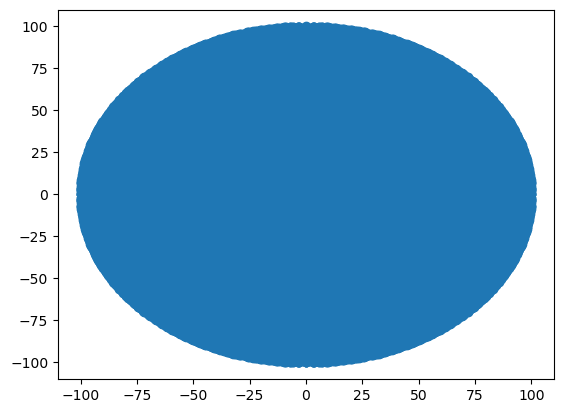

In [63]:
points = vertices1
plt.scatter(points[:, 2], points[:, 1])

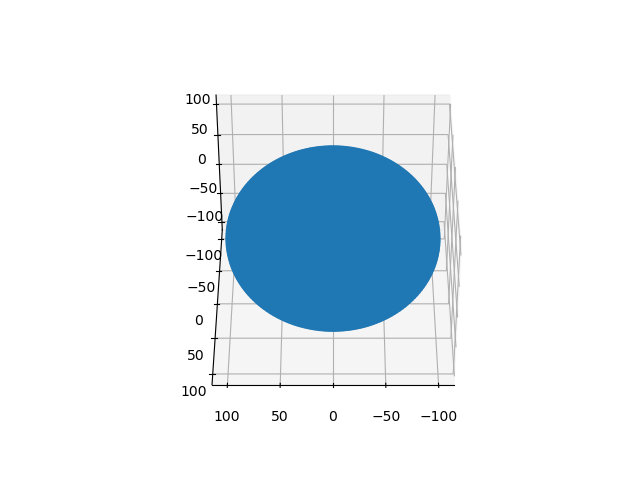

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 生成示例数据
x = points[:, 0]
y = points[:, 1]
z = points[:, 2]

# 定义绘图函数
def plot_3d(elev=30, azim=30):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, alpha=0.4)
    ax.view_init(elev=elev, azim=azim)
    plt.show()

plot_3d(elev=40, azim=90)